In [4]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
data = tfds.load('fashion_mnist', split='train')

In [6]:
data.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [7]:
dataiterator = data.as_numpy_iterator()

In [8]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

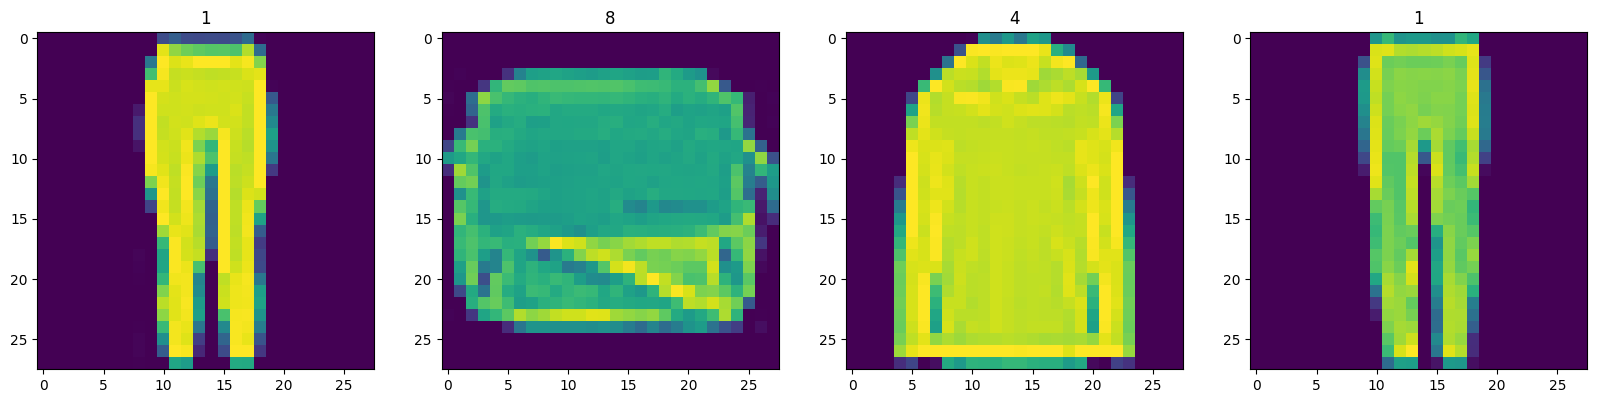

In [9]:
fig, ax =plt.subplots(ncols= 4, figsize=(20, 20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [10]:
def scale_images(data):
    image = data['image']
    return image / 255

In [11]:
data = data.map(scale_images)
data = data.cache()
data = data.shuffle(60000)
data = data.batch(128)
data = data.prefetch(64)

In [12]:
print(data)

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>


In [13]:
data.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [15]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim= 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding= 'same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding= 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding= 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding= 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1, 4, padding= 'same', activation= 'sigmoid'))

    return model

In [16]:
generator = build_generator()

In [17]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [18]:
img = generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 1s 546ms/step


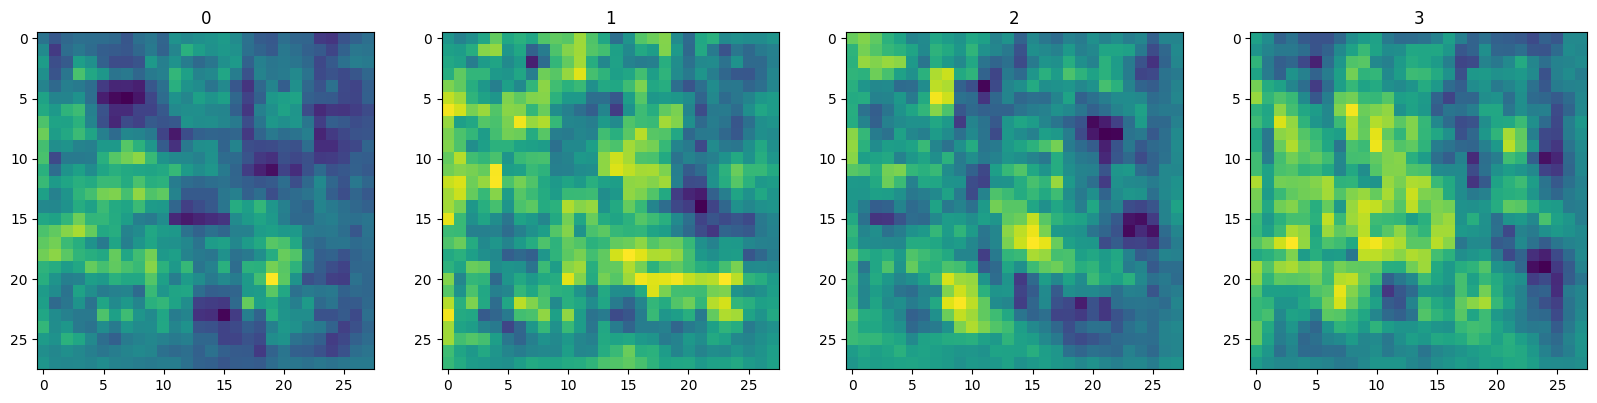

In [19]:
fig, ax = plt.subplots(ncols= 4, figsize=(20, 20))

for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [20]:

def build_discriminator():

    model = Sequential()

    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation= 'sigmoid'))

    return model

In [21]:

discriminator = build_discriminator()

In [22]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [23]:

img.shape

(28, 28, 1)

In [24]:
img = generator.predict(np.random.randn(4, 128, 1))


1/1 [==============================] - 0s 138ms/step


In [25]:
discriminator.predict(img)

1/1 [==============================] - 0s 121ms/step


array([[0.49128637],
       [0.49116504],
       [0.4912154 ],
       [0.49114224]], dtype=float32)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt = Adam(learning_rate= 0.0001)
d_opt = Adam(learning_rate= 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [28]:
from tensorflow.keras.models import Model
class imageGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):

        super().compile(*args, **kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training= False)

        #Training Discriminator
        with tf.GradientTape() as d_tape:

            yhat_real = self.discriminator(real_images, training= True)
            yhat_fake = self.discriminator(fake_images, training= True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

            d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
            self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))

        #Training Generator
        with tf.GradientTape() as g_tape:

            gen_images = self.generator(tf.random.normal((128, 128, 1)), training= True)

            predicted_labels = self.discriminator(gen_images, training= False)

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss ": total_d_loss, "g_loss ": total_g_loss}

In [29]:
imggan = imageGAN(generator, discriminator)

In [30]:
imggan.compile(g_opt, d_opt, g_loss, d_loss)

In [31]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [41]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim= 128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs= None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(f'generated_img_{epoch}_{i}.png'))
batch_size = 16
steps_per_epoch = len(data) // batch_size




In [ ]:
%%time
hist = imggan.fit(data, epochs=100, batch_size=batch_size, steps_per_epoch=steps_per_epoch, callbacks=[ModelMonitor()])

In [34]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))


1/1 [==============================] - 0s 476ms/step


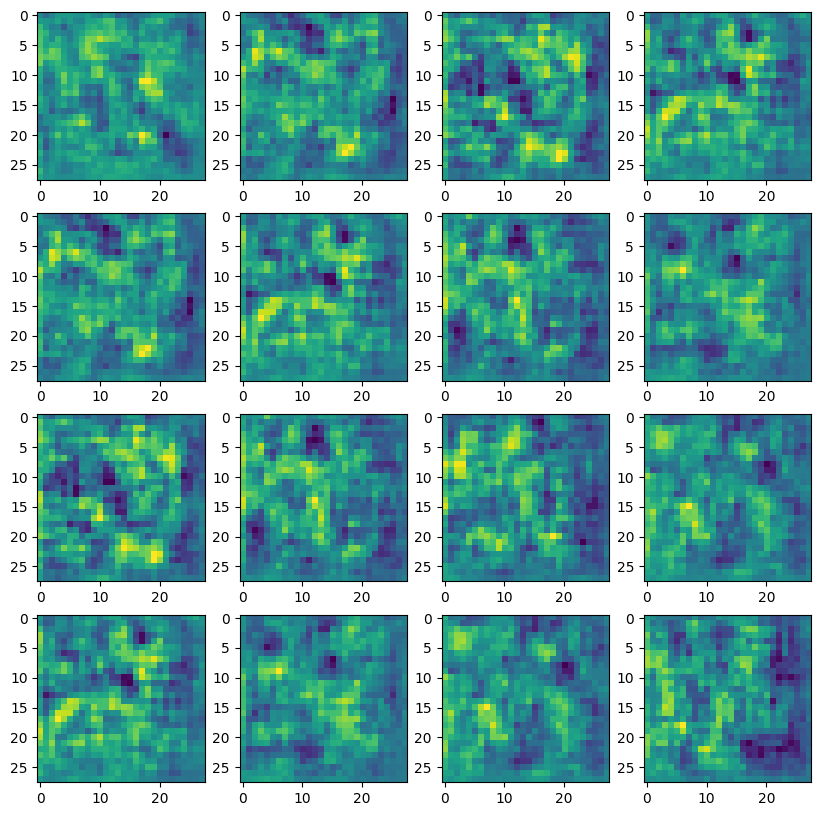

In [35]:
fig, ax = plt.subplots(ncols= 4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [36]:
generator.save_weights('generator_weights.h5')

In [37]:
from tensorflow.keras.models import load_model
loaded_model = build_generator()

In [38]:
loaded_model.compile()

In [39]:
loaded_model.load_weights('generator_weights.h5')

1/1 [==============================] - 1s 542ms/step


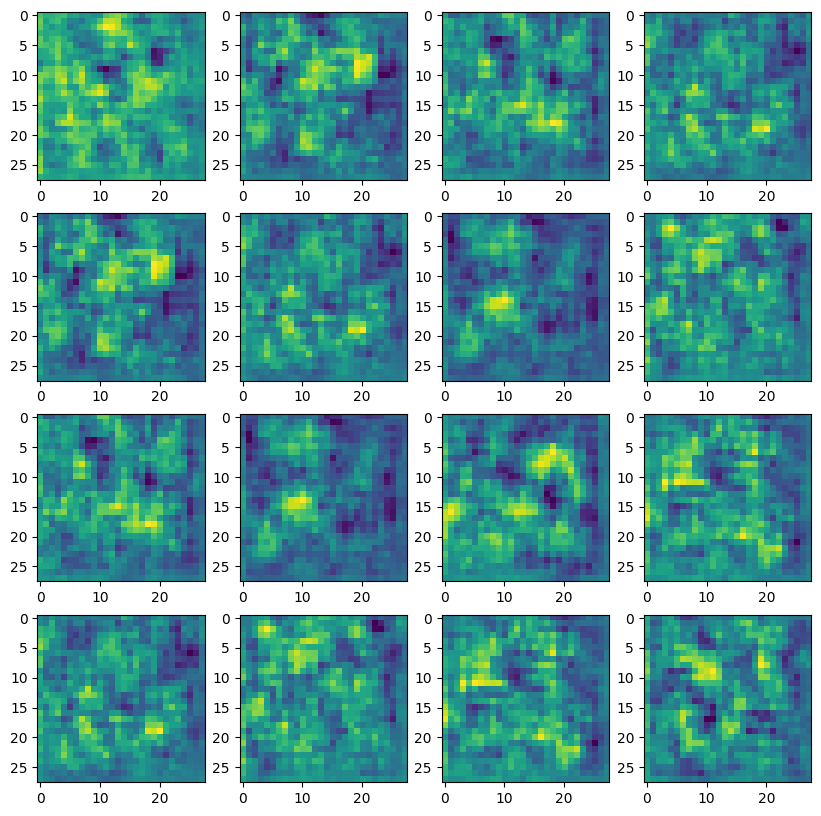

In [40]:
loaded_model_img = loaded_model.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols= 4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(loaded_model_img[(r+1)*(c+1)-1])